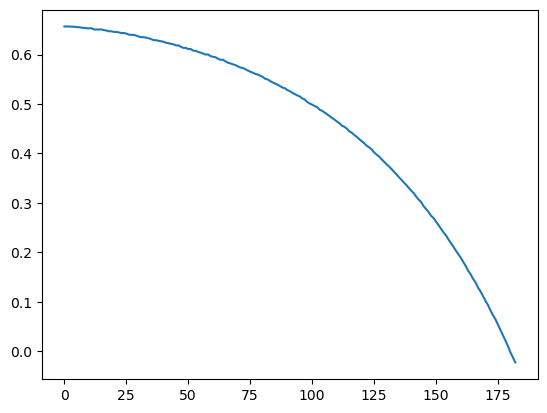

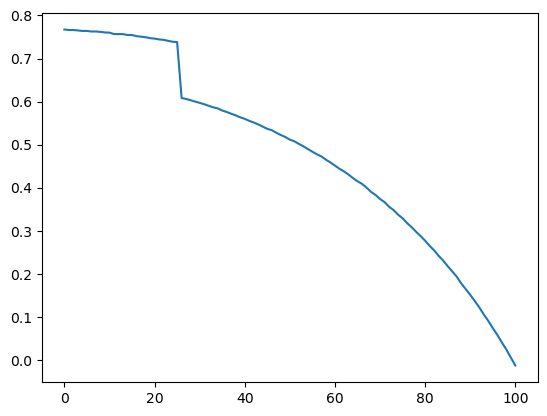

In [1]:
#PROJECT 4: EKF FOR DEGRADATION PREDICTION
#Written By Jared Rybarczyk, sections taken from Dr. Wang's examples

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scp

#import data sets (nominal HPC is gradual degradation, fault HPC is abrupt)
#Health_1 is actual degradation state, Health_1_N is noisy

gradual_deg = scp.loadmat('Norminal_HPC_data.mat')
abrupt_deg = scp.loadmat('Fault_HPC_data.mat')

stategrad = gradual_deg['Health_1']
measgrad = gradual_deg['Health_1_N']

stateabr = abrupt_deg['Health_1']
measabr = abrupt_deg['Health_1_N']

plt.figure()
plt.plot(np.arange(stategrad.shape[0]), stategrad)

plt.figure()
plt.plot(np.arange(stateabr.shape[0]), stateabr)

In [2]:
#Gradual Deterioration Parameters
R_grad = 0.05 #alternate values tried: 0.06, 0.08, 1
Q_grad = np.array([[1e-6, 0],[0, 1e-4]]) #alternate values tried for Q[0][0]: 1e-5, 1e-3, 1e-1
AB_grad = np.array([0.0001, 0.3]) #alternate values tried for A: 0.05, 0, 0.0005

#Abrupt Deterioration Parameters
R_abr = 0.08 #alternate values tried: 0.06, 0.08, 1
Q_abr = np.array([[4e-7, 0],[0, 1e-4]]) #alternate values tried for Q[0][0]: 1e-5, 1e-3, 1e-1
AB_abr = np.array([0.0004, 0.3]) #alternate values tried for A: 0.05, 0, 0.0005

#The general effect of changing the parameters from what was given was an increase in the RMSE and decrease in
#prediction accuracy. The small changes in R and A resulted in slight variation in RMSE. By far changing Q by 
#a magnitude of 10 had the greatest effect for both cases, often changing the RMSE by several integer values and 
#resulting in interesting graphical output. Overall, best RMSE was obtained from the given values.
#RMSE tended around 0.23-0.27 for the gradual case and around 0.31-0.33 for the abrupt case.

In [3]:
#EKF Functions

def EKF_grad(State, Meas, Para, Q, R, N): #takes in state, initial params, noise/covariance, and number of samples
    par = Para
    Est_p = Q
    result = np.zeros(len(State))
    for k in range(N):
        if k == 0:
            Ex_x = 0.65 - par[0]*((k+1)**par[1])
            Ex_y = Meas[k]
            Ex_h = np.array([-(k+1)**par[1], -par[0]*par[1]*((k+1)**(par[1]-1))])
            Est_p = Est_p + Q
            Kal_gain = np.dot(Est_p, Ex_h.T)/(np.dot(np.dot(Ex_h, Est_p),Ex_h.T)+R)
            par = par + Kal_gain*(Ex_y - Ex_x)
            Est_p = Est_p - np.dot(np.dot(Kal_gain, Ex_h), Est_p)
            result[k] = Ex_x
        else:
            Ex_x = result[k-1] - par[0]*((k+1)**par[1])
            Ex_y = Meas[k]
            Ex_h = np.array([-(k+1)**par[1], -par[0]*par[1]*((k+1)**(par[1]-1))])
            Est_p = Est_p + Q
            Kal_gain = np.dot(Est_p, Ex_h.T)/(np.dot(np.dot(Ex_h, Est_p),Ex_h.T)+R)
            par = par + Kal_gain*(Ex_y - Ex_x)
            Est_p = Est_p - np.dot(np.dot(Kal_gain, Ex_h), Est_p)
            result[k] = Ex_x
            
        for x in range(len(State)-N):
            result[Num+x] = result[N-1+x] - par[0]*((x+N+1)**par[1])
            
    return result


def EKF_abr(State, Meas, Para, Q, R, N): #takes in state, initial params, noise/covariance, and number of samples
    par = Para
    Est_p = Q
    result = np.zeros(len(State))
    for k in range(N):
        if k == 0:
            Ex_x = 0.75 - par[0]*((k+1)**par[1])
            Ex_y = Meas[k]
            Ex_h = np.array([-(k+1)**par[1], -par[0]*par[1]*((k+1)**(par[1]-1))])
            Est_p = Est_p + Q
            Kal_gain = np.dot(Est_p, Ex_h.T)/(np.dot(np.dot(Ex_h, Est_p),Ex_h.T)+R)
            par = par + Kal_gain*(Ex_y - Ex_x)
            Est_p = Est_p - np.dot(np.dot(Kal_gain, Ex_h), Est_p)
            result[k] = Ex_x
        else:
            Ex_x = result[k-1] - par[0]*((k+1)**par[1])
            Ex_y = Meas[k]
            Ex_h = np.array([-(k+1)**par[1], -par[0]*par[1]*((k+1)**(par[1]-1))])
            Est_p = Est_p + Q
            Kal_gain = np.dot(Est_p, Ex_h.T)/(np.dot(np.dot(Ex_h, Est_p),Ex_h.T)+R)
            par = par + Kal_gain*(Ex_y - Ex_x)
            Est_p = Est_p - np.dot(np.dot(Kal_gain, Ex_h), Est_p)
            result[k] = Ex_x
            
        for x in range(len(State)-N):
            result[Num+x] = result[N-1+x] - par[0]*((x+N+1)**par[1])
            
    return result

def RMSE(Y,Y_pred):
    RMSE = np.sqrt(np.mean((Y-Y_pred)**2))
    return RMSE

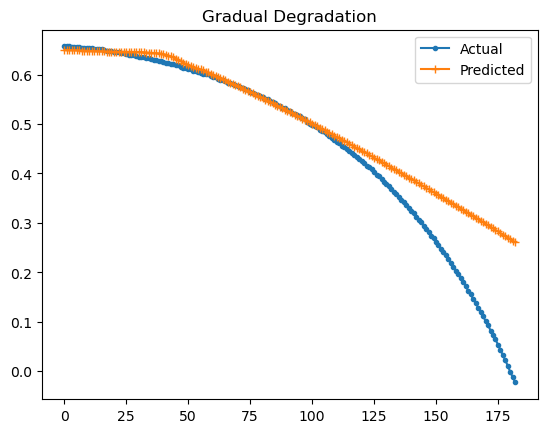

RMSE for gradual degredation is:  0.22900050192211588


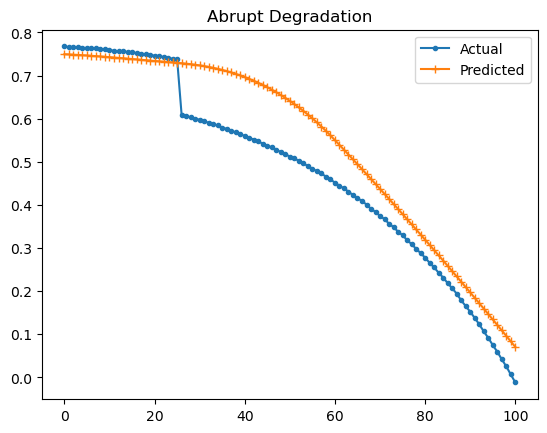

RMSE for abrupt degredation is:  0.3138899380749163


In [4]:
#Prediction Code
Num = 60 #Change from 60 (for part A) to 100 (for part B)
X_Vec = EKF_grad(stategrad, measgrad, AB_grad, Q_grad, R_grad, Num)

plt.figure
plt.plot(np.arange(len(stategrad)), stategrad, label = 'Actual', marker = '.')
plt.plot(np.arange(len(stategrad)), X_Vec, label = 'Predicted', marker = '+')
plt.title("Gradual Degradation")
plt.legend()
plt.show()

print("RMSE for gradual degredation is: ", RMSE(stategrad, X_Vec))


X_Vec = EKF_abr(stateabr, measabr, AB_abr, Q_abr, R_abr, Num)
plt.figure
plt.plot(np.arange(len(stateabr)), stateabr, label = 'Actual', marker = '.')
plt.plot(np.arange(len(stateabr)), X_Vec, label = 'Predicted', marker = '+')
plt.title("Abrupt Degradation")
plt.legend()
plt.show()

print("RMSE for abrupt degredation is: ", RMSE(stateabr, X_Vec))